# Задача: Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**<br>

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файла с данными и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## 1. Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
df = pd.read_csv("./real_estate_data.csv", sep="\t")

In [2]:
#Сделал переиндексирование потому что просто удобнее 
#смотреть на описание данных
df = df.reindex(sorted(df.columns), axis=1)

In [3]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      18157 non-null  float64
 1   balcony               12180 non-null  float64
 2   ceiling_height        14504 non-null  float64
 3   cityCenters_nearest   18180 non-null  float64
 4   days_exposition       20518 non-null  float64
 5   first_day_exposition  23699 non-null  object 
 6   floor                 23699 non-null  int64  
 7   floors_total          23613 non-null  float64
 8   is_apartment          2775 non-null   object 
 9   kitchen_area          21421 non-null  float64
 10  last_price            23699 non-null  float64
 11  living_area           21796 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23699 non-null  bool   
 14  parks_around3000      18181 non-null  float64
 15  parks_nearest      

In [5]:
#Сразу бросается в глаза огромное кол-во NaN
df.head()

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,...,locality_name,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images
0,18863.0,NaN,2.70,16028.0,NaN,2019-03-07T00:00:00,8,16.0,NaN,25.0,...,Санкт-Петербург,False,1.0,482.0,2.0,755.0,3,False,108.0,20
1,12817.0,2.0,NaN,18603.0,81.0,2018-12-04T00:00:00,1,11.0,NaN,11.0,...,посёлок Шушары,False,0.0,NaN,0.0,NaN,1,False,40.4,7
2,21741.0,0.0,NaN,13933.0,558.0,2015-08-20T00:00:00,4,5.0,NaN,8.3,...,Санкт-Петербург,False,1.0,90.0,2.0,574.0,2,False,56.0,10
3,28098.0,0.0,NaN,6800.0,424.0,2015-07-24T00:00:00,9,14.0,NaN,NaN,...,Санкт-Петербург,False,2.0,84.0,3.0,234.0,3,False,159.0,0
4,31856.0,NaN,3.03,8098.0,121.0,2018-06-19T00:00:00,13,14.0,NaN,41.0,...,Санкт-Петербург,False,2.0,112.0,1.0,48.0,2,False,100.0,2


**Вывод**

После первого осмотра данных бросается в глаза, что очень много значений NaN, и очень соответсвенно много колонок типа float => Нужно заменить данные на более логичные чтобы все привести к одному типу а именно int64

In [6]:
# a = df.select_dtypes(include='float64')
# df.isna().any()
# df[df['kitchen_area'].isna()].info()
# df[df['living_area'].isna()].info()
# df[df['floors_total'].isna()].isna().any()
# df = df.reindex(sorted(df.columns), axis=1)

## 2. Предобработка данных

In [7]:
#Данные далеко не идеальны нужно многое заменять на что то правдоподо-
#бное для определнных групп

df.isna().any()

airports_nearest         True
balcony                  True
ceiling_height           True
cityCenters_nearest      True
days_exposition          True
first_day_exposition    False
floor                   False
floors_total             True
is_apartment             True
kitchen_area             True
last_price              False
living_area              True
locality_name            True
open_plan               False
parks_around3000         True
parks_nearest            True
ponds_around3000         True
ponds_nearest            True
rooms                   False
studio                  False
total_area              False
total_images            False
dtype: bool

In [8]:
df[df['airports_nearest'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5542 entries, 5 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      0 non-null      float64
 1   balcony               2825 non-null   float64
 2   ceiling_height        2964 non-null   float64
 3   cityCenters_nearest   24 non-null     float64
 4   days_exposition       4675 non-null   float64
 5   first_day_exposition  5542 non-null   object 
 6   floor                 5542 non-null   int64  
 7   floors_total          5532 non-null   float64
 8   is_apartment          631 non-null    object 
 9   kitchen_area          4825 non-null   float64
 10  last_price            5542 non-null   float64
 11  living_area           4917 non-null   float64
 12  locality_name         5534 non-null   object 
 13  open_plan             5542 non-null   bool   
 14  parks_around3000      24 non-null     float64
 15  parks_nearest       

In [9]:
df.query('locality_name == "Санкт-Петербург"')['airports_nearest'].median()

26757.5

In [10]:
# Видно что медиана не слишком отличается от медианы только 
#лишь по питеру, видимо те кто живут за городом не хотят заполнять
# по сути не нужную информацию, т.к те кто покупает дом за городом
# вряд ли смотрят расстояние до аэропорта из за того что до него 
# просто по дефолту далеко
df['airports_nearest'].median()

26726.0

In [11]:
all_places = df[df['airports_nearest'].isna()]['locality_name'].value_counts().index

In [12]:
for i in all_places:
    print(i)

посёлок Мурино
Всеволожск
Гатчина
деревня Кудрово
Выборг
Кудрово
деревня Новое Девяткино
Сертолово
Кириши
Сланцы
Волхов
Тосно
Кингисепп
Никольское
Коммунар
Сосновый Бор
Санкт-Петербург
Кировск
Отрадное
посёлок Бугры
Приозерск
деревня Старая
городской посёлок Янино-1
Шлиссельбург
Луга
Тихвин
поселок Бугры
посёлок Тельмана
поселок Романовка
Волосово
Мурино
поселок Мурино
посёлок городского типа Сиверский
Ивангород
городской посёлок Новоселье
городской посёлок Мга
поселок городского типа имени Свердлова
Сясьстрой
посёлок Щеглово
посёлок городского типа Кузьмоловский
поселок городского типа Синявино
посёлок Новогорелово
Лодейное Поле
деревня Лесколово
деревня Вартемяги
Подпорожье
поселок городского типа Рощино
Пикалёво
посёлок Сосново
посёлок городского типа имени Морозова
деревня Бегуницы
посёлок Новый Свет
городской поселок Большая Ижора
деревня Большие Колпаны
посёлок городского типа Токсово
Бокситогорск
деревня Горбунки
городской посёлок Назия
посёлок городского типа Рощино
поселок гор

Как я уже писал выше видно что не заполняют лишь люди живущие на окраине области т.е не в городе в следствие этого я решил ввести колонку с типом местности area_type, который как мне кажется в дальнейшем анализе может сильно помочь

In [13]:
def area_type(row):
    area = row['locality_name']
    if area == "Санкт-Петербург":
        return "город"
    else:
        return "область"

In [14]:
df['area_type'] = df.apply(area_type, axis = 1)

In [15]:
df.groupby('area_type')['locality_name'].count().sum()

23650

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      18157 non-null  float64
 1   balcony               12180 non-null  float64
 2   ceiling_height        14504 non-null  float64
 3   cityCenters_nearest   18180 non-null  float64
 4   days_exposition       20518 non-null  float64
 5   first_day_exposition  23699 non-null  object 
 6   floor                 23699 non-null  int64  
 7   floors_total          23613 non-null  float64
 8   is_apartment          2775 non-null   object 
 9   kitchen_area          21421 non-null  float64
 10  last_price            23699 non-null  float64
 11  living_area           21796 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23699 non-null  bool   
 14  parks_around3000      18181 non-null  float64
 15  parks_nearest      

In [17]:
# Видно что данных больше чем 23650 поэтому обьявления где даже не названы
# места их нахождения можно отбросить мне кажется без всякого
# чувства вины)
df.dropna(subset=['locality_name'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      18116 non-null  float64
 1   balcony               12137 non-null  float64
 2   ceiling_height        14490 non-null  float64
 3   cityCenters_nearest   18139 non-null  float64
 4   days_exposition       20470 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23565 non-null  float64
 8   is_apartment          2760 non-null   object 
 9   kitchen_area          21381 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           21752 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      18140 non-null  float64
 15  parks_nearest      

In [19]:
df[df['floors_total'].isna()]['floor'].head(15)
    

186      4
237      1
457     12
671      8
1757     9
1930     4
2392    22
2846    15
2952     6
3031    12
3438    12
3817     1
3831     7
4140     3
4617    12
Name: floor, dtype: int64

In [20]:
# Раз человек не заполнил информацию о балконе то скорее всего его
# и нет
df['balcony'] = df['balcony'].fillna(value=0)

In [21]:
median_from_city = df[df['locality_name'] == "Санкт-Петербург"]['airports_nearest'].median()
median_from_village = median_from_city + 102090
median_to_city_center = df[df['locality_name'] == "Санкт-Петербург"]['cityCenters_nearest'].median()
median_to_city_center_from_village = median_to_city_center + 102090

https://ru.distance.to/%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3/%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D0%B3%D1%80%D0%B0%D0%B4%D1%81%D0%BA%D0%B0%D1%8F-%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C Взял среднее расстояние из области до Питера и заменяю все NaN в колонах airport_nearest и cityCenters_nearest как сумму расстояния из области + медианы из этих колонок т.к все эти колонки по большей части заполнены для питера

In [22]:
df['airports_nearest'] = df['airports_nearest'].fillna(value=median_from_village)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(value=median_to_city_center_from_village)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        14490 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       20470 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23565 non-null  float64
 8   is_apartment          2760 non-null   object 
 9   kitchen_area          21381 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           21752 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      18140 non-null  float64
 15  parks_nearest      

In [24]:
# высота потолков мне кажется можно изменить по медиане в зависимости 
# от типа местности(колонка area_type)
df['ceiling_height'] = df['ceiling_height'].fillna(
    df.groupby('area_type')['ceiling_height'].transform('median')
)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        23650 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       20470 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23565 non-null  float64
 8   is_apartment          2760 non-null   object 
 9   kitchen_area          21381 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           21752 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      18140 non-null  float64
 15  parks_nearest      

In [26]:
#apartament
df[df['is_apartment'] == False]['open_plan'].value_counts()

False    2703
True        7
Name: open_plan, dtype: int64

In [27]:
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

In [28]:
df[df['is_apartment'] == False]['kitchen_area'].max()

93.2

In [29]:
df[df['is_apartment'] == True]['kitchen_area'].max()

87.2

In [30]:
# Делаю замену на False т.к видно что этот вид данных итак заполнен False-ами
#и он слабозаполнен и не хочется терять данные, поэтому вроде логичная замена
df['is_apartment'] = df['is_apartment'].fillna(value=False)

In [31]:
df[df['is_apartment'] == False]['total_area'].value_counts()

45.00     419
42.00     383
60.00     346
31.00     345
44.00     343
         ... 
237.00      1
40.96       1
90.02       1
32.72       1
76.75       1
Name: total_area, Length: 2177, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        23650 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       20470 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23565 non-null  float64
 8   is_apartment          23650 non-null  bool   
 9   kitchen_area          21381 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           21752 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      18140 non-null  float64
 15  parks_nearest      

In [33]:
#floors_total
df[df['floors_total'].isna()]

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,...,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images,area_type
186,39197.0,0.0,2.7,12373.0,49.0,2018-10-02T00:00:00,4,NaN,False,12.00,...,False,1.0,123.0,0.0,NaN,2,False,65.2,12,город
237,22041.0,0.0,2.7,17369.0,251.0,2016-11-23T00:00:00,1,NaN,False,NaN,...,False,0.0,NaN,1.0,374.0,1,False,28.1,4,город
457,37364.0,0.0,2.7,8322.0,727.0,2015-08-01T00:00:00,12,NaN,False,10.63,...,False,2.0,309.0,2.0,706.0,2,False,70.8,4,город
671,22041.0,0.0,2.7,17369.0,123.0,2017-04-06T00:00:00,8,NaN,False,16.80,...,False,0.0,NaN,1.0,374.0,3,False,93.6,4,город
1757,22735.0,0.0,2.7,11618.0,77.0,2017-04-22T00:00:00,9,NaN,False,NaN,...,False,1.0,835.0,1.0,652.0,1,False,39.0,5,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,51340.0,0.0,2.8,15363.0,512.0,2017-05-24T00:00:00,3,NaN,False,NaN,...,False,0.0,NaN,1.0,853.0,2,False,63.5,5,город
22656,22041.0,0.0,2.7,17369.0,127.0,2017-04-02T00:00:00,20,NaN,False,14.40,...,False,0.0,NaN,1.0,374.0,2,False,64.5,4,город
22808,19095.0,0.0,2.7,4529.0,260.0,2016-11-20T00:00:00,6,NaN,False,23.42,...,False,0.0,NaN,0.0,NaN,3,False,110.4,0,город
23590,19095.0,0.0,2.7,4529.0,104.0,2017-04-25T00:00:00,18,NaN,False,23.60,...,False,0.0,NaN,0.0,NaN,3,False,123.3,0,город


In [34]:
#floors_total был  заменен на медианное значание от area_type
df['floors_total'] = df['floors_total'].fillna(df.groupby('area_type')['floors_total'].transform('median'))

In [35]:
#living_area был  заменен на медианное значание от area_type
df['living_area'] = df['living_area'].fillna(df.groupby('area_type')['living_area'].transform('median'))

In [36]:
#kitchen_area был  заменен на медианное значание от area_type
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('area_type')['kitchen_area'].transform('median'))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        23650 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       20470 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23650 non-null  float64
 8   is_apartment          23650 non-null  bool   
 9   kitchen_area          23650 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           23650 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      18140 non-null  float64
 15  parks_nearest      

In [38]:
df[df['parks_nearest'].isna()]

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,...,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images,area_type
1,12817.0,2.0,2.60,18603.0,81.0,2018-12-04T00:00:00,1,11.0,False,11.00,...,False,0.0,NaN,0.0,NaN,1,False,40.40,7,область
5,128847.5,0.0,2.60,114334.5,55.0,2018-09-10T00:00:00,5,12.0,False,9.10,...,False,NaN,NaN,NaN,NaN,1,False,30.40,10,область
6,52996.0,1.0,2.60,19143.0,155.0,2017-11-02T00:00:00,6,26.0,False,14.40,...,False,0.0,NaN,0.0,NaN,1,False,37.30,6,область
7,23982.0,2.0,2.70,11634.0,NaN,2019-04-18T00:00:00,22,24.0,False,18.90,...,False,0.0,NaN,0.0,NaN,2,False,71.60,5,город
8,128847.5,0.0,2.60,114334.5,189.0,2018-05-23T00:00:00,26,27.0,False,8.81,...,False,NaN,NaN,NaN,NaN,1,False,33.16,20,область
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,19424.0,1.0,2.75,4489.0,519.0,2016-10-13T00:00:00,7,25.0,False,10.60,...,False,0.0,NaN,1.0,806.0,2,False,72.90,11,город
23692,128847.5,0.0,2.60,114334.5,413.0,2017-07-07T00:00:00,4,5.0,False,6.00,...,False,NaN,NaN,NaN,NaN,1,False,30.00,2,область
23695,128847.5,0.0,2.60,114334.5,45.0,2018-01-15T00:00:00,4,5.0,False,8.50,...,False,NaN,NaN,NaN,NaN,3,False,59.00,14,область
23696,128847.5,0.0,2.60,114334.5,NaN,2018-02-11T00:00:00,1,3.0,False,8.90,...,False,NaN,NaN,NaN,NaN,2,False,56.70,18,область


In [39]:
for i in df.dropna(subset=['parks_nearest'])['locality_name']:
    print(i)

Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Пушкин
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Кронштадт
Колпино
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Павловск
Пушкин
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Кронштадт
Санкт-Петербург
Пушкин
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Пушкин
Сестрорецк
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
С

Пушкин
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Сестрорецк
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Пушкин
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Кронштадт
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
посёлок Стрельна
Павловск
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Пушкин
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Сестрорецк
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Сестрорецк
Санкт-Петербург
Санкт

Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Кронштадт
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Красное Село
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург

Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Кронштадт
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Колпино
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Пушкин
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Кронштадт
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт

Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Зеленогорск
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Сан

Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург

Петергоф
Санкт-Петербург
Пушкин
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Красное Село
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Колпино
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Колпино
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Са

Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Колпино
Кронштадт
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Ломоносов
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Колпино
Санкт-Петербург
Колпино
Колпино
Пушкин
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Пушкин
Санкт-Петербург
Санкт-Петербург
Павловск
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Пет

Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Красное Село
Кр

Видно что заполняли значения для расстояния до парков в основном только жители города, но есть и все же жители областти заполнившие эту колонку, поэтому будем заполнять по типу местности(area_type) а не по living area отдельно

In [40]:
df['parks_nearest'] = df['parks_nearest'].fillna(
    df.groupby('area_type')['parks_nearest'].transform('median')
)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        23650 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       20470 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23650 non-null  float64
 8   is_apartment          23650 non-null  bool   
 9   kitchen_area          23650 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           23650 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      18140 non-null  float64
 15  parks_nearest      

In [42]:
# Можно заполнять нулями т.к скорее всего леса то есть может быть
# но парков в нынешнем понимание скорее всего в области таковой нет
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        23650 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       20470 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23650 non-null  float64
 8   is_apartment          23650 non-null  bool   
 9   kitchen_area          23650 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           23650 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      23650 non-null  float64
 15  parks_nearest      

In [44]:
#Расстояние до прудов делаем аналогично как и для парков
df['ponds_nearest'] = df['ponds_nearest'].fillna(
    df.groupby('area_type')['ponds_nearest'].transform('median')
)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        23650 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       20470 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23650 non-null  float64
 8   is_apartment          23650 non-null  bool   
 9   kitchen_area          23650 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           23650 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      23650 non-null  float64
 15  parks_nearest      

In [46]:
df[df['area_type'] == 'область']['ponds_around3000'].median()

0.0

In [47]:
#Не заполнили кол-во прудов значит нет
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        23650 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       20470 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23650 non-null  float64
 8   is_apartment          23650 non-null  bool   
 9   kitchen_area          23650 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           23650 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      23650 non-null  float64
 15  parks_nearest      

In [49]:
df[df['days_exposition'].isna()]

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,...,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images,area_type
0,18863.0,0.0,2.70,16028.0,NaN,2019-03-07T00:00:00,8,16.0,False,25.00,...,False,1.0,482.0,2.0,755.0,3,False,108.00,20,город
7,23982.0,2.0,2.70,11634.0,NaN,2019-04-18T00:00:00,22,24.0,False,18.90,...,False,0.0,460.0,0.0,503.0,2,False,71.60,5,город
44,30471.0,1.0,2.70,11603.0,NaN,2018-11-18T00:00:00,3,22.0,False,9.90,...,False,1.0,620.0,1.0,1152.0,1,False,40.00,13,город
45,30011.0,0.0,2.65,12872.0,NaN,2018-12-02T00:00:00,7,9.0,False,7.00,...,False,0.0,460.0,0.0,503.0,2,False,50.60,17,город
46,15114.0,2.0,2.60,12702.0,NaN,2019-01-31T00:00:00,9,24.0,False,8.30,...,False,0.0,460.0,0.0,503.0,2,False,52.10,17,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,11827.0,0.0,3.00,11459.0,NaN,2018-11-02T00:00:00,17,26.0,False,15.60,...,False,0.0,460.0,0.0,503.0,4,False,145.00,20,город
23685,48393.0,1.0,2.50,51818.0,NaN,2019-01-24T00:00:00,5,5.0,False,5.60,...,False,0.0,374.5,0.0,488.5,1,False,31.00,15,область
23694,24665.0,0.0,3.70,4232.0,NaN,2017-03-21T00:00:00,3,5.0,False,13.83,...,False,1.0,796.0,3.0,381.0,3,False,133.81,9,город
23696,128847.5,0.0,2.60,114334.5,NaN,2018-02-11T00:00:00,1,3.0,False,8.90,...,False,0.0,374.5,0.0,488.5,2,False,56.70,18,область


In [50]:
# Все дни которые не заполнены скорее всего просто еще в продаже
# поэтому давайте заполним все это нулями чтобы 
#позже это было удобнее срезать
df['days_exposition'] = df['days_exposition'].fillna(value=0)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        23650 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       23650 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23650 non-null  float64
 8   is_apartment          23650 non-null  bool   
 9   kitchen_area          23650 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           23650 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      23650 non-null  float64
 15  parks_nearest      

In [52]:
a = df.select_dtypes(include='float64').columns

In [53]:
df.isna().any()

airports_nearest        False
balcony                 False
ceiling_height          False
cityCenters_nearest     False
days_exposition         False
first_day_exposition    False
floor                   False
floors_total            False
is_apartment            False
kitchen_area            False
last_price              False
living_area             False
locality_name           False
open_plan               False
parks_around3000        False
parks_nearest           False
ponds_around3000        False
ponds_nearest           False
rooms                   False
studio                  False
total_area              False
total_images            False
area_type               False
dtype: bool

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        23650 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       23650 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23650 non-null  float64
 8   is_apartment          23650 non-null  bool   
 9   kitchen_area          23650 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           23650 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      23650 non-null  float64
 15  parks_nearest      

In [55]:
df[df['parks_around3000'].isna()]['parks_around3000']

Series([], Name: parks_around3000, dtype: float64)

In [56]:
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      23650 non-null  float64
 1   balcony               23650 non-null  float64
 2   ceiling_height        23650 non-null  float64
 3   cityCenters_nearest   23650 non-null  float64
 4   days_exposition       23650 non-null  float64
 5   first_day_exposition  23650 non-null  object 
 6   floor                 23650 non-null  int64  
 7   floors_total          23650 non-null  float64
 8   is_apartment          23650 non-null  bool   
 9   kitchen_area          23650 non-null  float64
 10  last_price            23650 non-null  float64
 11  living_area           23650 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23650 non-null  bool   
 14  parks_around3000      23650 non-null  float64
 15  parks_nearest      

In [58]:
#заменяем float на int64
for i in a:
    df['{}'.format(i)] = df['{}'.format(i)].astype('int64')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   airports_nearest      23650 non-null  int64 
 1   balcony               23650 non-null  int64 
 2   ceiling_height        23650 non-null  int64 
 3   cityCenters_nearest   23650 non-null  int64 
 4   days_exposition       23650 non-null  int64 
 5   first_day_exposition  23650 non-null  object
 6   floor                 23650 non-null  int64 
 7   floors_total          23650 non-null  int64 
 8   is_apartment          23650 non-null  bool  
 9   kitchen_area          23650 non-null  int64 
 10  last_price            23650 non-null  int64 
 11  living_area           23650 non-null  int64 
 12  locality_name         23650 non-null  object
 13  open_plan             23650 non-null  bool  
 14  parks_around3000      23650 non-null  int64 
 15  parks_nearest         23650 non-null

Сначала посмотрел какие же всё таки столбцы у нас содержат NaN, оказалось достаточно много. Затем сделал срез по всем NaN содердащимся в колонке airport_nearest и увидел что существует некая зависимость между парками прудами и расстоянием до города. И да оказалось что существует некая причина этим явлениям а именно люди с NaN в этих колонках жили в пригороде. В следствие этого явления я решил что хорошо бы создать новую колонку "area_type" где если колонка locality_name равна питеру то она относится к городу и наоборот соответсвенно. NaN в кол-ве балконов были заменены на 0 потому что скорее всего они появляются вследствие того что данные просто не заполняются. ceiling_height были заполнены методом transform('median') сгруппированную по area_type, таким же образом было сделано со столбцами floors_total, living_area, kitchen_area. is_apartment были заменены на False там где NaN. 

## 3. Расчёты и добавление результатов в таблицу

In [60]:
df['floors_total']

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23650, dtype: int64

In [61]:
#добавляем цену за метр
df['price_for_meter'] = df['last_price']/df['total_area']

In [62]:
df.head()

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images,area_type,price_for_meter
0,18863,0,2,16028,0,2019-03-07T00:00:00,8,16,False,25,...,1,482,2,755,3,False,108,20,город,120370.370370
1,12817,2,2,18603,81,2018-12-04T00:00:00,1,11,False,11,...,0,374,0,488,1,False,40,7,область,83750.000000
2,21741,0,2,13933,558,2015-08-20T00:00:00,4,5,False,8,...,1,90,2,574,2,False,56,10,город,92785.714286
3,28098,0,2,6800,424,2015-07-24T00:00:00,9,14,False,9,...,2,84,3,234,3,False,159,0,город,408176.100629
4,31856,0,3,8098,121,2018-06-19T00:00:00,13,14,False,41,...,2,112,1,48,2,False,100,2,город,100000.000000


In [63]:
df['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [64]:
df['first_day_exposition'].value_counts().index[0:11]

Index(['2018-02-01T00:00:00', '2017-11-10T00:00:00', '2017-10-13T00:00:00',
       '2017-09-27T00:00:00', '2018-03-26T00:00:00', '2018-07-10T00:00:00',
       '2017-09-28T00:00:00', '2018-03-06T00:00:00', '2018-02-08T00:00:00',
       '2018-02-20T00:00:00', '2018-01-12T00:00:00'],
      dtype='object')

In [65]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [66]:
def floor_type(row):
    floor = row['floor']
    last_floor = row['floors_total']
    if floor == 1:
        return "первый"
    elif last_floor==floor:
        return "последний"
    else:
        return "другой"

In [67]:
df['floor_type'] = df.apply(floor_type, axis=1)

In [68]:
df['floor_type'].value_counts()

другой       17401
последний     3337
первый        2912
Name: floor_type, dtype: int64

In [69]:
df['living_area/total_area'] = df['living_area'] / df['total_area']

In [70]:
df['kitchen_area/total_area'] = df['kitchen_area'] / df['total_area']

In [71]:
df

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,...,ponds_nearest,rooms,studio,total_area,total_images,area_type,price_for_meter,floor_type,living_area/total_area,kitchen_area/total_area
0,18863,0,2,16028,0,2019-03-07,8,16,False,25,...,755,3,False,108,20,город,120370.370370,другой,0.472222,0.231481
1,12817,2,2,18603,81,2018-12-04,1,11,False,11,...,488,1,False,40,7,область,83750.000000,первый,0.450000,0.275000
2,21741,0,2,13933,558,2015-08-20,4,5,False,8,...,574,2,False,56,10,город,92785.714286,другой,0.607143,0.142857
3,28098,0,2,6800,424,2015-07-24,9,14,False,9,...,234,3,False,159,0,город,408176.100629,другой,0.194969,0.056604
4,31856,0,3,8098,121,2018-06-19,13,14,False,41,...,48,2,False,100,2,город,100000.000000,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,24665,0,3,4232,0,2017-03-21,3,5,False,13,...,381,3,False,133,9,город,72932.330827,другой,0.548872,0.097744
23695,128847,0,2,114334,45,2018-01-15,4,5,False,8,...,488,3,False,59,14,область,52542.372881,другой,0.644068,0.135593
23696,128847,0,2,114334,0,2018-02-11,1,3,False,8,...,488,2,False,56,18,область,44642.857143,первый,0.517857,0.142857
23697,39140,2,3,10364,602,2017-03-28,12,17,False,23,...,196,2,False,76,13,город,150986.842105,другой,0.407895,0.302632


**Вывод**

Все нижеперечисленные параметры были подсчитаны
   - цену квадратного метра;
   - день недели, месяц и год публикации объявления;
   - этаж квартиры; варианты — первый, последний, другой;
   - соотношение жилой и общей площади, а также отношение площади кухни к общей.

## 4. Исследовательский анализ данных

In [72]:
import matplotlib.pyplot as plt

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   airports_nearest         23650 non-null  int64         
 1   balcony                  23650 non-null  int64         
 2   ceiling_height           23650 non-null  int64         
 3   cityCenters_nearest      23650 non-null  int64         
 4   days_exposition          23650 non-null  int64         
 5   first_day_exposition     23650 non-null  datetime64[ns]
 6   floor                    23650 non-null  int64         
 7   floors_total             23650 non-null  int64         
 8   is_apartment             23650 non-null  bool          
 9   kitchen_area             23650 non-null  int64         
 10  last_price               23650 non-null  int64         
 11  living_area              23650 non-null  int64         
 12  locality_name            23650 n

In [74]:
min=df['total_area'].min()
max=df['total_area'].max()

<AxesSubplot:>

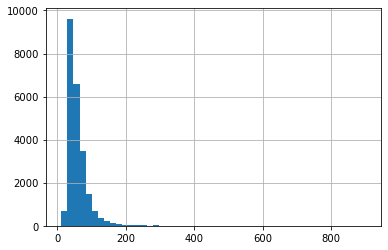

In [75]:
df['total_area'].hist(bins=50)

<AxesSubplot:>

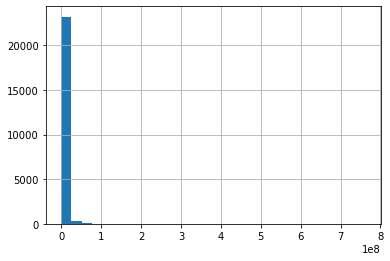

In [76]:
df['last_price'].hist(bins=30)

<AxesSubplot:>

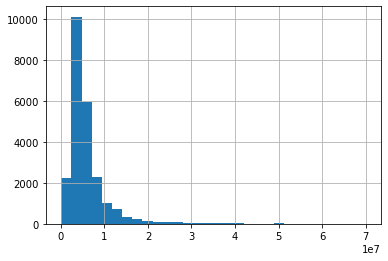

In [77]:
df['last_price'].hist(bins=30, range=(100000, 70000000))

<AxesSubplot:>

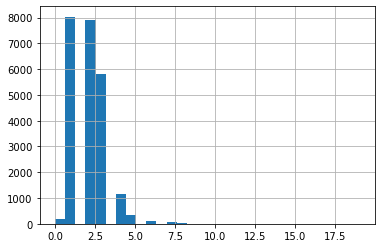

In [78]:
df['rooms'].hist(bins=30)

<AxesSubplot:>

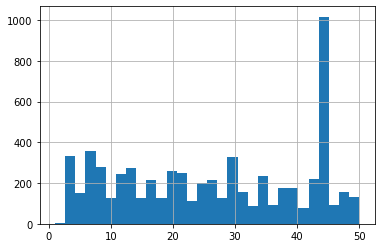

In [79]:
df['days_exposition'].hist(bins=30, range=(1,50))


In [80]:
print(df['days_exposition'].mean())
print(df['days_exposition'].median())

156.4489640591966
73.0


In [81]:
df.columns

Index(['airports_nearest', 'balcony', 'ceiling_height', 'cityCenters_nearest',
       'days_exposition', 'first_day_exposition', 'floor', 'floors_total',
       'is_apartment', 'kitchen_area', 'last_price', 'living_area',
       'locality_name', 'open_plan', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'rooms', 'studio', 'total_area',
       'total_images', 'area_type', 'price_for_meter', 'floor_type',
       'living_area/total_area', 'kitchen_area/total_area'],
      dtype='object')

In [82]:
df['days_exposition'].quantile(q=0.14)

3.0

In [83]:
df.drop(df[df['days_exposition'] == 0].index)['days_exposition'].quantile()

95.0

In [84]:
df.drop(df[df['days_exposition'] == 0].index)['days_exposition'].quantile(q=0.95)


647.5499999999993

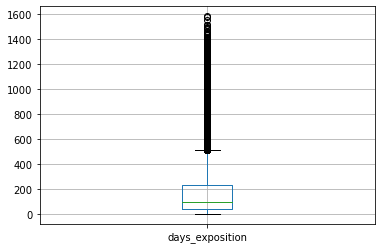

In [85]:
a = df.drop(df[(df['days_exposition'] == 0)].index)
boxplot = a.boxplot(column = 'days_exposition')
plt.show()

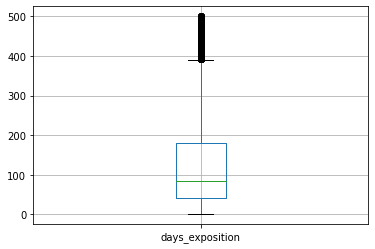

In [86]:
a = df.drop(df[(df['days_exposition'] == 0) | (df['days_exposition'] > 500)].index)
boxplot = a.boxplot(column = 'days_exposition')
plt.show()

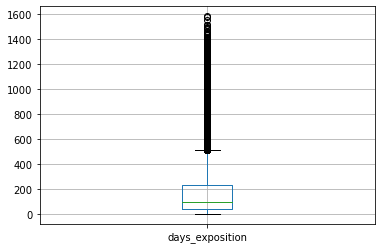

In [87]:
a = df.drop(df[df['days_exposition'] == 0].index)
boxplot = a.boxplot(column = 'days_exposition', return_type='axes')
plt.show()

In [88]:
num = (a['days_exposition'].quantile(q=0.75) - a['days_exposition'].quantile(q=0.25))*1.5

In [89]:
num

279.0

In [90]:
a['days_exposition'].quantile(0.75) + num

510.0

In [91]:
a['days_exposition'].quantile(0.25) 

45.0

In [92]:
a['days_exposition'].quantile(0.5)

95.0

In [93]:
(a['days_exposition'] < 40).sum()

4558

In [94]:
new_df = a[a['days_exposition'] <= 510]

Необычно долгой продажей будет значение больше 510, а необычно быстрой продажи просто нет получается исходя из значений боксплота, но в целом это логично у тебя могут купить очень быстро твой товар потому что это рынок и всё зависит от цены, зато есть обьявления висящие очень долго и скорее всего за этими обьявлениями стоят кем то созданные непонятно зачем обьявления, обычно я так понимаю можно допинговать цены на рынке, поэтому вроде всё логично. Также обычно продажа составляет 95 дней

In [95]:
df['cityCenters_nearest']

0         16028
1         18603
2         13933
3          6800
4          8098
          ...  
23694      4232
23695    114334
23696    114334
23697     10364
23698    114334
Name: cityCenters_nearest, Length: 23650, dtype: int64

In [96]:
print(new_df['last_price'].corr(new_df['total_area']))
print(new_df['last_price'].corr(new_df['rooms']))
print(new_df['last_price'].corr(new_df['cityCenters_nearest']))

0.6297959026399345
0.34186444634103974
-0.18172810668597958


In [97]:
print(df['last_price'].corr(df['total_area']))
print(df['last_price'].corr(df['rooms']))
print(df['last_price'].corr(df['cityCenters_nearest']))

0.6537215382537774
0.36342062218770665
-0.20470077275912435


Видно слабую корреляцию цены и площади, в остальных случаях кореляций точно нет, также видно что в случае когда мы отбрасываем лишние данные корреляции становятся меньше, что также подтвердает предполодение лишь о слабой корреляции

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

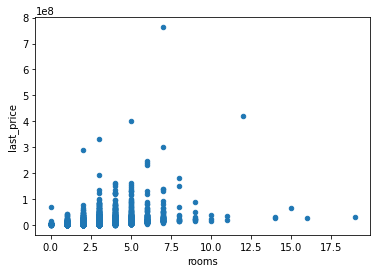

In [98]:
df.plot(x='rooms', y ='last_price', kind='scatter')

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

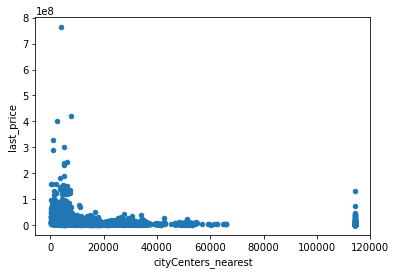

In [99]:
df.plot(x='cityCenters_nearest', y = 'last_price', kind='scatter')

In [100]:
df.total_area

0        108
1         40
2         56
3        159
4        100
        ... 
23694    133
23695     59
23696     56
23697     76
23698     32
Name: total_area, Length: 23650, dtype: int64

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

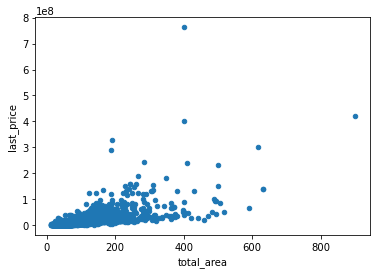

In [101]:
df.plot(x='total_area', y = 'last_price', kind='scatter')

В целом видно что есть корреляции для всех этих величин (площади, числа комнат, удалённости от центра) с ценой но всё равно есть еще много видимо других факторов которые влияют на цену

In [102]:
df.groupby('floor_type')['last_price'].sum() / df.groupby('floor_type')['last_price'].count()

floor_type
другой       6.676804e+06
первый       4.800465e+06
последний    7.352602e+06
Name: last_price, dtype: float64

In [103]:
df.groupby('floor_type')['last_price'].median()

floor_type
другой       4850000.0
первый       3900000.0
последний    4300000.0
Name: last_price, dtype: float64

In [104]:
df.groupby('floor_type')['last_price'].mean()

floor_type
другой       6.676804e+06
первый       4.800465e+06
последний    7.352602e+06
Name: last_price, dtype: float64

In [105]:
df['floor_type'].value_counts()

другой       17401
последний     3337
первый        2912
Name: floor_type, dtype: int64

Видно что 'первый' этаж всегда самый дешевый, а 'последний' этаж являются самым дорогим в среднем, а в медианном значение это обьяснимо разницей в кол-ве значений между 'другой' и 'последний' этаж, а именно 'другой' этаж намного больше

In [106]:
df['days'] = pd.DatetimeIndex(df['first_day_exposition']).day

In [107]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [108]:
df['days'].corr(df['last_price'])

0.009208753582913991

In [109]:
df['month'].corr(df['last_price'])

0.0027410294199242216

In [110]:
df['year'].corr(df['last_price'])

-0.04292705107683152

<AxesSubplot:xlabel='last_price', ylabel='year'>

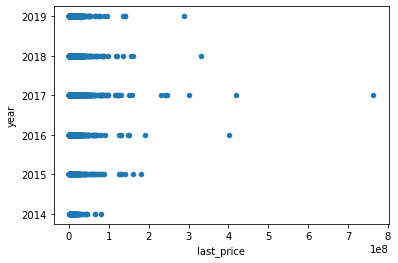

In [111]:
df.plot(x='last_price', y='year', kind='scatter')

<AxesSubplot:xlabel='last_price', ylabel='month'>

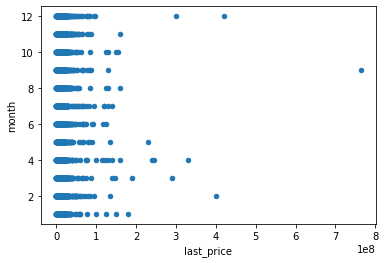

In [112]:
df.plot(x='last_price', y='month', kind='scatter')

<AxesSubplot:xlabel='last_price', ylabel='month'>

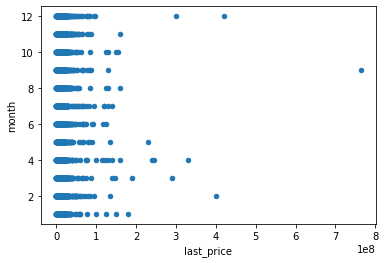

In [113]:
df.plot(x='last_price', y='month', kind='scatter')

Корреляции между датой не замечено

In [114]:
df.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: last_price, dtype: int64

In [115]:
index = df.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10).index

In [116]:
len(index)

10

In [117]:
for i in index:
    new_df = df[df['locality_name'] == "{}".format(i)]
    price = (new_df['last_price']/new_df['total_area']).median()
    print(price, i)
    
    #print("Средняя цена квадратного метра равна {}".format(price))

105263.15789473684 Санкт-Петербург
86410.96979332273 посёлок Мурино
77223.32015810277 посёлок Шушары
65811.40350877192 Всеволожск
100000.0 Пушкин
74861.11111111111 Колпино
92222.22222222222 посёлок Парголово
67924.52830188679 Гатчина
92647.05882352941 деревня Кудрово
58333.333333333336 Выборг


Самая дешевая цена в Выборге, самая дорогая в Питере, что логично

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

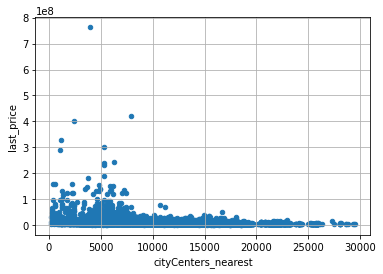

In [118]:
second_df = df[(df['locality_name'] == 'Санкт-Петербург') & (df['cityCenters_nearest'] < 100000)]
second_df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True)

Видно, что центр начинается между 5000 и 10000, а именно где то около 7500-7600 

In [119]:
centr = df[(df['locality_name'] == 'Санкт-Петербург') & (df['cityCenters_nearest'] < 7600)]

<AxesSubplot:>

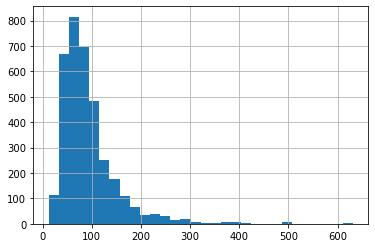

In [120]:
centr['total_area'].hist(bins=30)

<AxesSubplot:>

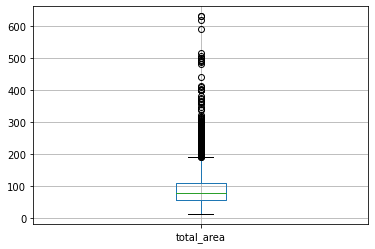

In [121]:
centr.boxplot(column='total_area')

<AxesSubplot:>

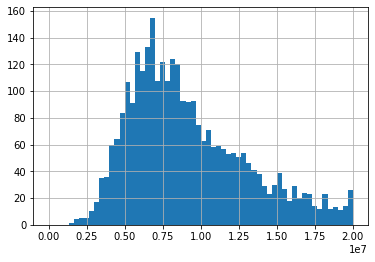

In [122]:
centr['last_price'].hist(bins=60, range=(0,2*(10**7)))

<AxesSubplot:>

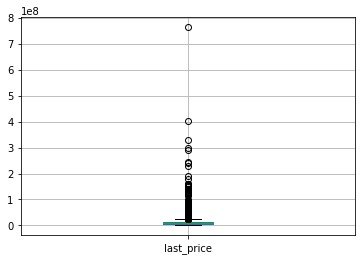

In [123]:
centr.boxplot(column='last_price')

<AxesSubplot:>

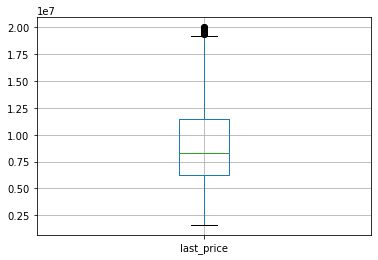

In [124]:
centr[centr['last_price'] < 20000000].boxplot(column='last_price')

<AxesSubplot:>

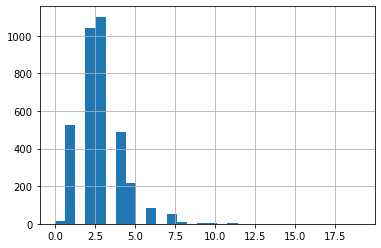

In [125]:
centr['rooms'].hist(bins=30)

In [126]:
centr['is_apartment'].sum()

13

<AxesSubplot:>

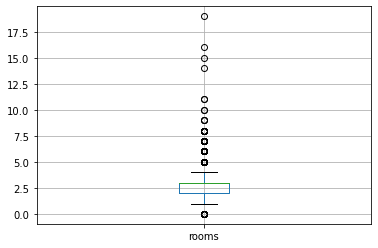

In [127]:
centr.boxplot(column='rooms')

<AxesSubplot:>

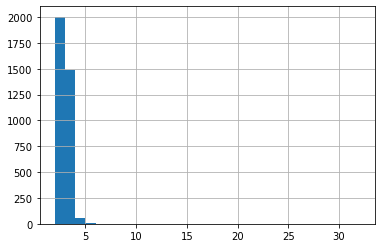

In [128]:
centr['ceiling_height'].hist(bins=30)

<AxesSubplot:>

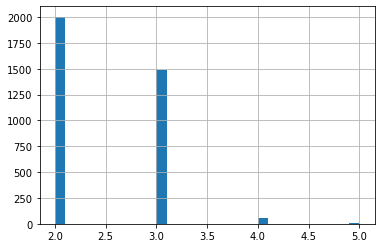

In [129]:
centr['ceiling_height'].hist(bins=30, range=(2,5))

<AxesSubplot:>

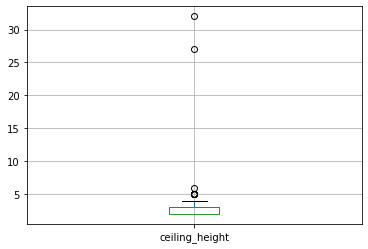

In [130]:
centr.boxplot(column='ceiling_height')

<AxesSubplot:>

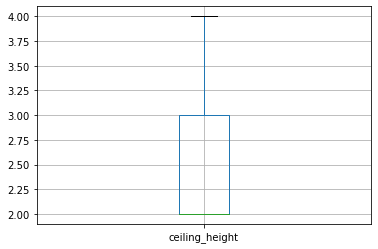

In [131]:
centr[centr['ceiling_height'] < 5].boxplot(column='ceiling_height')

In [132]:
centr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3552 entries, 3 to 23694
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   airports_nearest         3552 non-null   int64         
 1   balcony                  3552 non-null   int64         
 2   ceiling_height           3552 non-null   int64         
 3   cityCenters_nearest      3552 non-null   int64         
 4   days_exposition          3552 non-null   int64         
 5   first_day_exposition     3552 non-null   datetime64[ns]
 6   floor                    3552 non-null   int64         
 7   floors_total             3552 non-null   int64         
 8   is_apartment             3552 non-null   bool          
 9   kitchen_area             3552 non-null   int64         
 10  last_price               3552 non-null   int64         
 11  living_area              3552 non-null   int64         
 12  locality_name            3552 non

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

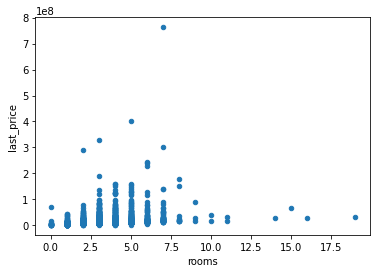

In [133]:
centr.plot(x='rooms',y='last_price', kind='scatter')

In [134]:
centr['last_price'].corr(centr['rooms'])

0.3154028661605355

<AxesSubplot:xlabel='floor', ylabel='last_price'>

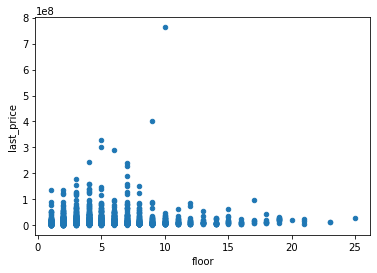

In [135]:
centr.plot(x='floor',y='last_price', kind='scatter')

In [136]:
centr['last_price'].corr(centr['floor'])

0.10775796418307715

<AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>

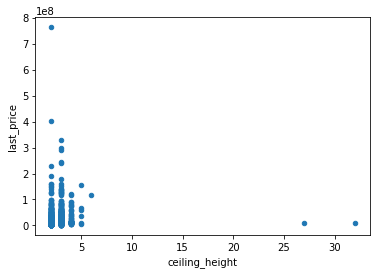

In [137]:
centr.plot(x='ceiling_height',y='last_price', kind="scatter")

In [138]:
centr['last_price'].corr(centr['ceiling_height'])

0.07508561541529737

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

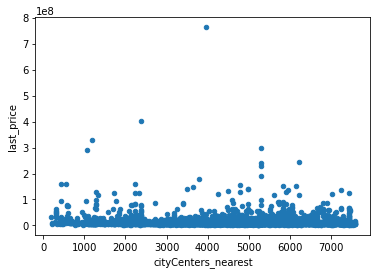

In [139]:
centr.plot(x="cityCenters_nearest", y="last_price", kind='scatter')

<AxesSubplot:xlabel='days', ylabel='last_price'>

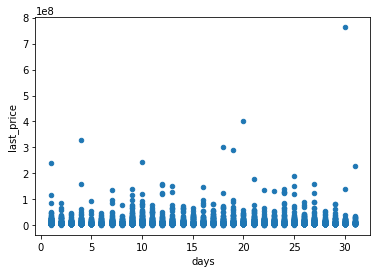

In [140]:
centr.plot(x='days', y='last_price', kind='scatter')

<AxesSubplot:xlabel='month', ylabel='last_price'>

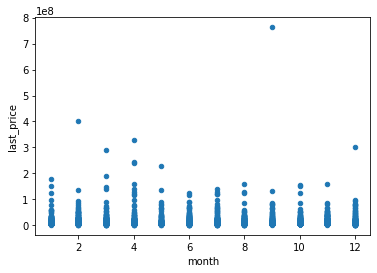

In [141]:
centr.plot(x='month', y='last_price', kind='scatter')

<AxesSubplot:xlabel='year', ylabel='last_price'>

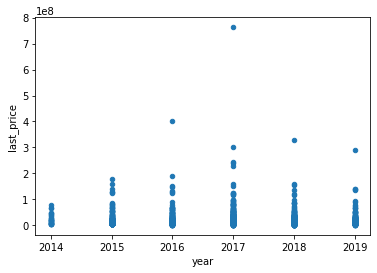

In [142]:
centr.plot(x='year', y='last_price', kind='scatter')

In [143]:
centr['cityCenters_nearest'].corr(centr['last_price'])

-0.04606326393538025

In [144]:
centr['days'].corr(centr['last_price'])

0.030301549060118296

In [145]:
centr['month'].corr(centr['last_price'])

-0.012958103419238573

In [146]:
centr['year'].corr(centr['last_price'])

-0.04719377826594231

In [147]:
centr['last_price'].corr(centr['total_area'])

0.6138596475719479

**Вывод**


Необычно долгой продажей будет значение больше 510, а необычно быстрой продажи просто нет получается исходя из значений боксплота, но в целом это логично у тебя могут купить очень быстро твой товар потому что это рынок и всё зависит от цены, зато есть обьявления висящие очень долго и скорее всего за этими обьявлениями стоят кем то созданные непонятно зачем обьявления, обычно я так понимаю можно допинговать цены на рынке, поэтому вроде всё логично. Также обычно продажа составляет 95 дней. 


Видно слабую корреляцию цены и площади, в остальных случаях кореляций точно нет, также видно что в случае когда мы отбрасываем лишние данные корреляции становятся меньше, что также подтвердает предполодение лишь о том что скорее всего те данные которые мы отбросили не настоящие ибо они усиливают слабую корреляцию

В целом видно что есть корреляции для всех этих величин (площади, числа комнат, удалённости от центра) с ценой но всё равно есть еще много видимо других факторов которые влияют на цену

Видно что 'первый' этаж всегда самый дешевый, а 'последний' этаж являются самым дорогим в среднем, а в медианном значение это обьяснимо разницей в кол-ве значений между 'другой' и 'последний' этаж, а именно 'другой' этаж намного больше

Цена не зависит от дня,месяца или года

Самая дешевая цена в Выборге, самая дорогая в Питере, что логично

Видно, что центр начинается между 5000 и 10000, а именно где то около 7500-7600 

у перечисленных колонок(число комнат, этаж, удалённость от центра, дата размещения объявления) нет корреляции с ценой


## 5. Общий вывод

Исходя из данного анализа данных становится видно что работа с данными очень сложная вещь и очень многие  параметры не очен понятно как оценивать. Данные очень часто загрязнены и часто их нужно очищать и искать достаточно логичное обьяснение своим действиям. Я заметил что мне показалось странно это то что цена на рынке далеко не зависит от таких субьективных понятий как площадь, что у меня например вызывает недоумение небольшое ведь казалось бы больше площадь помещения больше цена, но видимо жизнь вносит свои коррективы и не даёт нам порой продавать слишком выгодно.Вообще самая сильная корреляция как раз у площади но мне кажется что есть возможно что еще сильнее влияет, но я не исключаю того что я не прав. Вообще если я прав то получается что цена очень вариабельная штута.